# Pandas - Data Analysis with Python


Pandas is a high-performance, easy-to-use data structures and data analysis tools.

<img src="images/pandas.jpg" style="width: 500px;"/>

## What is it good for?

Working with (large) data sets and created automated data processes.

Pandas is extensively used to prepare data in data science (machine learning, data analytics, ...)

**Examples**: 
* **Import and export** data into standard formats (CSV, Excel, Latex, ..).
* Combine with Numpy for **advanced computations** or Matplotlib for **visualisations**.
* Calculate **statistics** and answer questions about the data, like
  * What's the average, median, max, or min of each column?
  * Does column A correlate with column B?
  * What does the distribution of data in column C look like?
* **Clean** up data (e.g. fill out missing information and fix inconsistent formatting) and **merge** multiple data sets into one common dataset.



## Some interesting data sources

### (Norsk) Statistisk sentralbyrå
https://www.ssb.no

Employment rates, immigration rates housing market, ...

<img src="images/ssb.png" style="width: 400px;"/>

### Finn API 
https://www.finn.no/api

Note: Unfortunately currently only open for business



### Oslo Bysykkel API
https://developer.oslobysykkel.no

Live usage data and statistics.

**!! This lecture will use this data.**

### Ruter API 
https://developer.entur.org

Travel planning and live departure information. For example live departure information 


<img src="images/raspberry_pi_project.jpg" style="width: 300px;"/>

(Credits: Malte Pliszewski)

### YR data
http://om.yr.no/verdata/free-weather-data/

### Financial and economic data
https://www.quandl.com/

### And lots lots more:

* Almost every "smart" device, internet of things, ...

## More information

* Official Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/tutorials.html 
* Pandas cookbook: http://pandas.pydata.org/pandas-docs/stable/cookbook.html
* Wes McKinney, Python for Data Analysis 
![Python for Data Analysis](images/python_for_data_analysis.gif "Python for Data Analysis")

## Installation

* If you have Anaconda: Already installed
* If you have Miniconda: 
      conda install pandas
* If you have your another Python distribution: 
      python3 -m pip install pandas

## Quick guide through Pandas


In [ ]:
%matplotlib inline

First import pandas (and numpy) as usual.

In [ ]:
import pandas as pd

import numpy as np

## The basic data structures of Pandas

<center>
<img src="https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png
" style="width: 500px;"/>

    Figure: Fundamental data types in Pandas.
    (Image source: https://www.learndatasci.com)
</center>

### Series 

Series in Pands are 1-dimensional, axis-labeled array capable of holding any data type.

The simplest way to create a Series is from a list:

In [ ]:
s1 = pd.Series([1, 3, 5, np.nan, 6, 8])
s1

* Pandas relies on numpy to store the underlying data. Note the dtype property that we already know from numpy. 
* If no dtype is specified, it chooses a stuitable dtype for your data. 

## Specifying the axis label

By default, the data is labeld by integers. This can be changed with:

In [ ]:
s2 = pd.Series([1, 3, 5, np.nan, 6, 8], index=["a", "a", "c", "d", "e", "f"])
s2

# Time-series data

A common use-case is to have data labeled with time stamps (for instance sensor data).



In [ ]:
dates = pd.date_range(start='20181023', end='20191023', periods=6)
dates

In [ ]:
s3 = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates)
s3

# DataFrame

DataFrame's are 2-dimensional labeled data structure with columns of potentially different types.

The most basic method to create a DataFrame is from a dictionary:

In [ ]:
data = {
    'apples': [3, 0, 0, 1],
    'pears':  [6, 1, 3, 5]
}

purchases = pd.DataFrame(data)
purchases

**How did this work:** Each (key, value) pair in the dictionary is interpreted as a column in the data table. The key is used as column label.

As with Series, we can provide an index to label the y-axis:

In [ ]:
data = {
    'apples': [3, 0, 0, 1],
    'pears':  [6, 1, 3, 2]
}
customers = ["Marie", "Jørgen", "Hilde", "Hans"]

purchases = pd.DataFrame(data, index=customers)
purchases

## Extracting columns from a DataTable

When **loc**ating (i.e. extracting) a column of a DataFrame, one obtains a `Series`

In [ ]:
purchases.loc["Hans"]

In [ ]:
type(purchases.loc["Hans"])

## Combining two Series to a DataFrame 

In [ ]:
s1 = pd.Series([1, 2], index=['A', 'B'])
s2 = pd.Series([3, 4], index=['A', 'C'])
pd.concat([s1, s2, s1], axis=1, sort=False)

## Loading data from file

For pratical applications, we will read the data from a file rather from a dictionary. 

Pandas offers various drivers to load data in different formats:

In [ ]:
pd.read_*?

We will see this in a real application in a moment.

# Data analysis on the Oslo Byskkel data 



<img src="https://cdn.sanity.io/images/23ukf9xm/production/4acf4a351c2174972b61465210f56878c41bad65-5698x3799.jpg?w=1200&h=600&fit=max" style="width: 500px;"/>



**Goal**: Perfrom data analysis of the bike usage, such as:
* Identify peak and low points of biek station usage (over a year, week or day)?
* Which are the most and least used bike stations?
* Which are the most and least used bike routes?
* Visualize the bike usage in Oslo.

## Step 1: Data aquisition and inspection

The monthly usage data can be downloaded here: https://developer.oslobysykkel.no/data. 


I downloaded the data from August to September 2016:

In [ ]:
!ls -hl data/bysykkel/*.csv

Let's inspect the content of one of these files:

In [ ]:
!wc data/bysykkel/trips-2016.10.1-2016.10.31.csv

## Loading the data into a DataFrame

Since this is a comma seperated file, we can use Panda's `read_csv` function:

In [ ]:
trips = pd.read_csv('data/bysykkel/trips-2016.10.1-2016.10.31.csv', 
                    sep=',')

The result is stored in  a `DataFrame` object. The first row of the csv was used as column labels.

In [ ]:
trips

We can use the `head` and `tail` functions to only show the (by default 5) top rows in the data table.

In [ ]:
trips.head(5)

## Fixing columns types

Pandas tries to **automatically detect the type** of a column:

In [ ]:
trips.dtypes

We can see that this **automatic detection failed** for:

* `Start time`:  should be a date
* `End time`:  should be a date
* `End station`:  should be a integer

## Fixing  start and end times

In order to be able to sort or filter by date, we need to tell Pandas that this column should be parsed as dates. We can do this directly when loading in the data: 

In [ ]:
trips = pd.read_csv(
    "data/bysykkel/trips-2016.10.1-2016.10.31.csv",
    sep=",",
    parse_dates=["Start time", "End time"],
    date_parser=lambda col: pd.to_datetime(col, utc=True),
)

**Note!**  The lambda function is necessary to read dates with mixed time-zones!

In [ ]:
trips.dtypes

In [ ]:
trips.head()

### Fixing end station

We expected `End station` to be of type `np.int64`. We can enforce this with:

In [ ]:
trips = pd.read_csv(
    "data/bysykkel/trips-2016.10.1-2016.10.31.csv",
    sep=",",
    parse_dates=["Start time", "End time"],
    date_parser=lambda col: pd.to_datetime(col, utc=True),
    dtype={"End station": np.int64},
)

**Conclusion**: 
`End station` contains `Not a Number` values or`NaN` values, which can be represented in the `float` datatype, but not in the `int` datatype

In [ ]:
trips.sort_values("End station").tail(100)

# Selecting data from dataframes

## Selecting columns


There are three main ways to select columns from a DataTable:

* indexing notation [].
* The .loc accessor
* The .iloc accessor

## Selecting columns with the index notation

Use the index notation if you know the name of the column(s) that you want to extract.

If you use a single column, the result is a Series:

In [173]:
trips["Start time"].head()

0   2016-10-01 04:00:08+00:00
1   2016-10-01 04:00:41+00:00
2   2016-10-01 04:01:02+00:00
3   2016-10-01 04:01:20+00:00
4   2016-10-01 04:02:16+00:00
Name: Start time, dtype: datetime64[ns, UTC]

## Selecting multiple columns

Multiple columns are selected by indexing with a list of column titles. The result is a DataFrame:

In [174]:
trips[["Start time", "End time"]].head()

,Start time,End time
0,2016-10-01 04:00:08+00:00,2016-10-01 04:09:47+00:00
1,2016-10-01 04:00:41+00:00,2016-10-01 04:11:07+00:00
2,2016-10-01 04:01:02+00:00,2016-10-01 04:15:52+00:00
3,2016-10-01 04:01:20+00:00,2016-10-01 04:15:04+00:00
4,2016-10-01 04:02:16+00:00,2016-10-01 04:04:29+00:00


### Selecting rows and columns 

`loc`  a more explicit alternative for selecting rows and/or columns

**Syntax**: `DataFrame.loc[ROWS, COLUMNS]`

In [175]:
trips.loc[[1, 4, 5], ["Start time", "End time"]]

,Start time,End time
1,2016-10-01 04:00:41+00:00,2016-10-01 04:11:07+00:00
4,2016-10-01 04:02:16+00:00,2016-10-01 04:04:29+00:00
5,2016-10-01 04:04:22+00:00,2016-10-01 04:24:40+00:00


Use the : notation to select ranges of columns/rows.

### Selecting rows and columns based on indices

`iloc` is the same is `loc` but expectes the index positions instead of column names (i.e. always uses intergers)

**Syntax**: `DataFrame.iloc[ROWS, COLUMNS]`

In [176]:
trips.iloc[:5, 0:2]

,Start station,Start time
0,283,2016-10-01 04:00:08+00:00
1,169,2016-10-01 04:00:41+00:00
2,211,2016-10-01 04:01:02+00:00
3,200,2016-10-01 04:01:20+00:00
4,157,2016-10-01 04:02:16+00:00


## Selecting based on values in columns

Comparisons on a series produce a new series of booleans.
This can be used to construct a "mask" of values that can be passed
to loc or index-access:

In [177]:
trips["Start station"] == 283

0          True
1         False
2         False
3         False
4         False
          ...  
242753    False
242754    False
242755    False
242756    False
242757    False
Name: Start station, Length: 242758, dtype: bool

In [178]:
(trips["Start station"] == 283).sum()

1321

In [179]:
trips[trips["Start station"] == 283]

,Start station,Start time,End station,End time
0,283,2016-10-01 04:00:08+00:00,238.0,2016-10-01 04:09:47+00:00
359,283,2016-10-01 06:55:45+00:00,219.0,2016-10-01 07:01:49+00:00
486,283,2016-10-01 07:24:19+00:00,284.0,2016-10-01 07:28:29+00:00
572,283,2016-10-01 07:38:59+00:00,170.0,2016-10-01 07:41:09+00:00
650,283,2016-10-01 07:49:42+00:00,189.0,2016-10-01 07:53:22+00:00
...,...,...,...,...
242126,283,2016-10-31 18:43:21+00:00,267.0,2016-10-31 18:46:47+00:00
242140,283,2016-10-31 18:48:02+00:00,176.0,2016-10-31 18:52:59+00:00
242313,283,2016-10-31 19:46:46+00:00,222.0,2016-10-31 19:59:02+00:00
242357,283,2016-10-31 20:01:14+00:00,184.0,2016-10-31 20:05:26+00:00


We can even do complex arithmetic on columns

In [180]:
durations = trips["End time"] - trips["Start time"]
durations

0        0 days 00:09:39
1        0 days 00:10:26
2        0 days 00:14:50
3        0 days 00:13:44
4        0 days 00:02:13
               ...      
242753   0 days 00:10:43
242754   0 days 00:15:29
242755   0 days 00:07:31
242756   0 days 00:05:19
242757   0 days 00:05:45
Length: 242758, dtype: timedelta64[ns]

In [181]:
durations.quantile(0.9)

Timedelta('0 days 00:23:21')

Anything that results in a boolean Series with the same index as a dataframe or series
can be used to select a subset of data.

This example says: give us the top 10% (above 90th percential) of trips by duration

In [182]:
trips[durations >= durations.quantile(0.9)]

,Start station,Start time,End station,End time
33,285,2016-10-01 04:33:13+00:00,222.0,2016-10-01 05:57:49+00:00
41,277,2016-10-01 04:37:56+00:00,277.0,2016-10-01 05:30:49+00:00
52,183,2016-10-01 04:44:03+00:00,272.0,2016-10-01 05:08:39+00:00
64,208,2016-10-01 04:52:09+00:00,281.0,2016-10-01 14:08:30+00:00
109,251,2016-10-01 05:16:10+00:00,185.0,2016-10-01 09:54:50+00:00
...,...,...,...,...
242610,158,2016-10-31 21:42:49+00:00,158.0,2016-10-31 22:38:37+00:00
242632,257,2016-10-31 21:51:15+00:00,169.0,2016-10-31 23:29:49+00:00
242722,191,2016-10-31 22:31:43+00:00,253.0,2016-11-01 01:56:19+00:00
242744,189,2016-10-31 22:46:57+00:00,275.0,2016-11-01 00:45:11+00:00


Or specify a value. Pandas has lots of *very* useful convenience functions
for comparing dates. You can often specify a string which pandas will interpret

In [183]:
trips[durations >= "1 day"]

,Start station,Start time,End station,End time
178,243,2016-10-01 05:43:24+00:00,175.0,2016-10-18 07:53:19+00:00
963,226,2016-10-01 08:39:35+00:00,172.0,2016-10-06 17:09:17+00:00
1370,226,2016-10-01 09:35:22+00:00,173.0,2016-10-17 05:48:48+00:00
3629,199,2016-10-01 12:43:13+00:00,240.0,2016-10-03 21:08:30+00:00
4677,301,2016-10-01 13:59:43+00:00,176.0,2016-10-04 05:36:49+00:00
...,...,...,...,...
229348,204,2016-10-29 13:25:04+00:00,182.0,2016-10-31 07:37:25+00:00
229826,260,2016-10-29 14:13:46+00:00,219.0,2016-10-31 05:41:37+00:00
230667,267,2016-10-29 15:52:05+00:00,277.0,2016-10-30 18:40:50+00:00
232648,229,2016-10-30 06:38:10+00:00,287.0,2016-10-31 08:05:02+00:00


Find all the trips without an end station using `.isna()`:

In [184]:
trips[trips["End station"].isna()]

,Start station,Start time,End station,End time
6741,226,2016-10-01 16:40:40+00:00,NaN,2016-10-04 05:53:55+00:00
8941,245,2016-10-01 21:38:17+00:00,NaN,2016-10-05 10:19:55+00:00
25293,200,2016-10-03 18:34:27+00:00,NaN,2016-10-06 05:36:33+00:00
33905,158,2016-10-04 15:58:25+00:00,NaN,2016-10-05 10:19:52+00:00
73805,162,2016-10-08 18:36:28+00:00,NaN,2016-10-12 06:39:46+00:00
105754,257,2016-10-12 15:57:30+00:00,NaN,2016-10-13 08:02:41+00:00
107496,233,2016-10-12 19:05:32+00:00,NaN,2016-10-17 05:56:12+00:00
117359,267,2016-10-13 20:55:38+00:00,NaN,2016-10-14 09:43:21+00:00
153782,232,2016-10-19 06:08:40+00:00,NaN,2016-10-20 05:42:02+00:00
200309,158,2016-10-25 17:22:32+00:00,NaN,2016-10-25 18:02:16+00:00


## Special handling of strings and datetime

Series with datetime data or strings have special accessor methods for working with that kind of data
by accessing a `.dt` or `.str` attribute, giving access to 

In [185]:
trips["Start time"].dt.weekday

0         5
1         5
2         5
3         5
4         5
         ..
242753    0
242754    0
242755    0
242756    0
242757    0
Name: Start time, Length: 242758, dtype: int64

Boolean series can be combined using Python's bitwise or (`|`) and bitwise and (`&`) operators.
So we can find late-night trips, i.e. those that start between 22:00 and 04:00

In [186]:
trips[(trips["Start time"].dt.hour >= 22) | (trips["Start time"].dt.hour <= 3)]

,Start station,Start time,End station,End time
26424,287,2016-10-04 03:59:55+00:00,195.0,2016-10-04 04:03:18+00:00
26425,229,2016-10-04 03:59:56+00:00,247.0,2016-10-04 04:05:28+00:00
79522,206,2016-10-10 03:59:56+00:00,196.0,2016-10-10 04:04:46+00:00
108408,283,2016-10-13 03:59:52+00:00,280.0,2016-10-13 04:05:36+00:00
108409,251,2016-10-13 03:59:54+00:00,265.0,2016-10-13 04:05:13+00:00
...,...,...,...,...
242753,284,2016-10-31 22:53:30+00:00,164.0,2016-10-31 23:04:13+00:00
242754,218,2016-10-31 22:53:48+00:00,292.0,2016-10-31 23:09:17+00:00
242755,204,2016-10-31 22:54:28+00:00,277.0,2016-10-31 23:01:59+00:00
242756,204,2016-10-31 22:56:57+00:00,201.0,2016-10-31 23:02:16+00:00


## GroupBy

grouping is like creating a dictionary of dataframes for subsets of your data.
You can group by any kind of value.
The result is like a dictionary of data frames,
where each one contains a subset of data matching some criterion.

You can pass groupby one or more column names to group by unique values on that column

In [187]:
trips.groupby("Start station")

groupby can be expensive, so it delays actual operations as late as possible

In [188]:
trips.groupby("Start station")["End station"]

Metrics such as `count`, `unique`, `value_counts` etc. result in actual evaluation

In [189]:
trips.groupby("Start station")["End station"].count()

Start station
157    2108
158    1465
159    1597
160    1121
161    2444
       ... 
305     621
306    1414
307     256
308     257
309     464
Name: End station, Length: 131, dtype: int64

`.value_counts()` creates a Series, so we have a two-level index:

In [190]:
trips.groupby("Start station")["End station"].value_counts()

Start station  End station
157            211.0          165
               157.0          125
               163.0          112
               186.0           96
               277.0           94
                             ... 
309            275.0            1
               290.0            1
               292.0            1
               294.0            1
               301.0            1
Name: End station, Length: 13969, dtype: int64

In [191]:
trips.groupby("Start station")["End station"].value_counts()[157]

End station
211.0    165
157.0    125
163.0    112
186.0     96
277.0     94
        ... 
249.0      1
265.0      1
268.0      1
275.0      1
307.0      1
Name: End station, Length: 101, dtype: int64

We can use groupby to count the number of tripts that start on each weekday:

In [192]:
trips.groupby(trips["Start time"].dt.weekday).count()

,Start station,Start time,End station,End time
Start time,,,,
0,40526,40526,40525,40526
1,36907,36907,36905,36907
2,36468,36468,36465,36468
3,36990,36990,36989,36990
4,35199,35199,35199,35199
5,32125,32125,32122,32125
6,24543,24543,24542,24543


In [193]:
trips.groupby(trips["Start time"].dt.weekday)["Start station"].count()

Start time
0    40526
1    36907
2    36468
3    36990
4    35199
5    32125
6    24543
Name: Start station, dtype: int64

In [194]:
by_day = trips.groupby(trips["Start time"].dt.weekday)
grouped = trips.groupby([trips["Start time"].dt.weekday, trips["Start time"].dt.day == trips["End time"].dt.day])
print((grouped.count() / by_day.count())["Start station"].to_string(float_format="{:,.2%}".format))

Start time       
0           False    0.32%
            True    99.68%
1           False    0.34%
            True    99.66%
2           False    0.29%
            True    99.71%
3           False    0.34%
            True    99.66%
4           False    0.32%
            True    99.68%
5           False    0.48%
            True    99.52%
6           False    0.54%
            True    99.46%


In [195]:
by_day = trips.groupby(trips["Start time"].dt.weekday)
by_day.count()

,Start station,Start time,End station,End time
Start time,,,,
0,40526,40526,40525,40526
1,36907,36907,36905,36907
2,36468,36468,36465,36468
3,36990,36990,36989,36990
4,35199,35199,35199,35199
5,32125,32125,32122,32125
6,24543,24543,24542,24543


In [196]:
grouped = trips.groupby([trips["Start time"].dt.weekday, trips["Start time"].dt.day == trips["End time"].dt.day])
grouped.count()

Start station  Start time  End station  End time
Start time                                                        
0          False            129         129          128       129
           True           40397       40397        40397     40397
1          False            126         126          125       126
           True           36781       36781        36780     36781
2          False            106         106          103       106
           True           36362       36362        36362     36362
3          False            125         125          124       125
           True           36865       36865        36865     36865
4          False            111         111          111       111
           True           35088       35088        35088     35088
5          False            154         154          151       154
           True           31971       31971        31971     31971
6          False            132         132          131       132
           True           24411       24411        24411     24411

In [197]:
s = (grouped.count() / by_day.count())["Start station"]
s

Start time       
0           False    0.003183
            True     0.996817
1           False    0.003414
            True     0.996586
2           False    0.002907
            True     0.997093
3           False    0.003379
            True     0.996621
4           False    0.003153
            True     0.996847
5           False    0.004794
            True     0.995206
6           False    0.005378
            True     0.994622
Name: Start station, dtype: float64

In [198]:
print(s.to_string(float_format="{:,.2%}".format))

Start time       
0           False    0.32%
            True    99.68%
1           False    0.34%
            True    99.66%
2           False    0.29%
            True    99.71%
3           False    0.34%
            True    99.66%
4           False    0.32%
            True    99.68%
5           False    0.48%
            True    99.52%
6           False    0.54%
            True    99.46%


## Visualisation

We can use the `plot` class method to plot our data table:

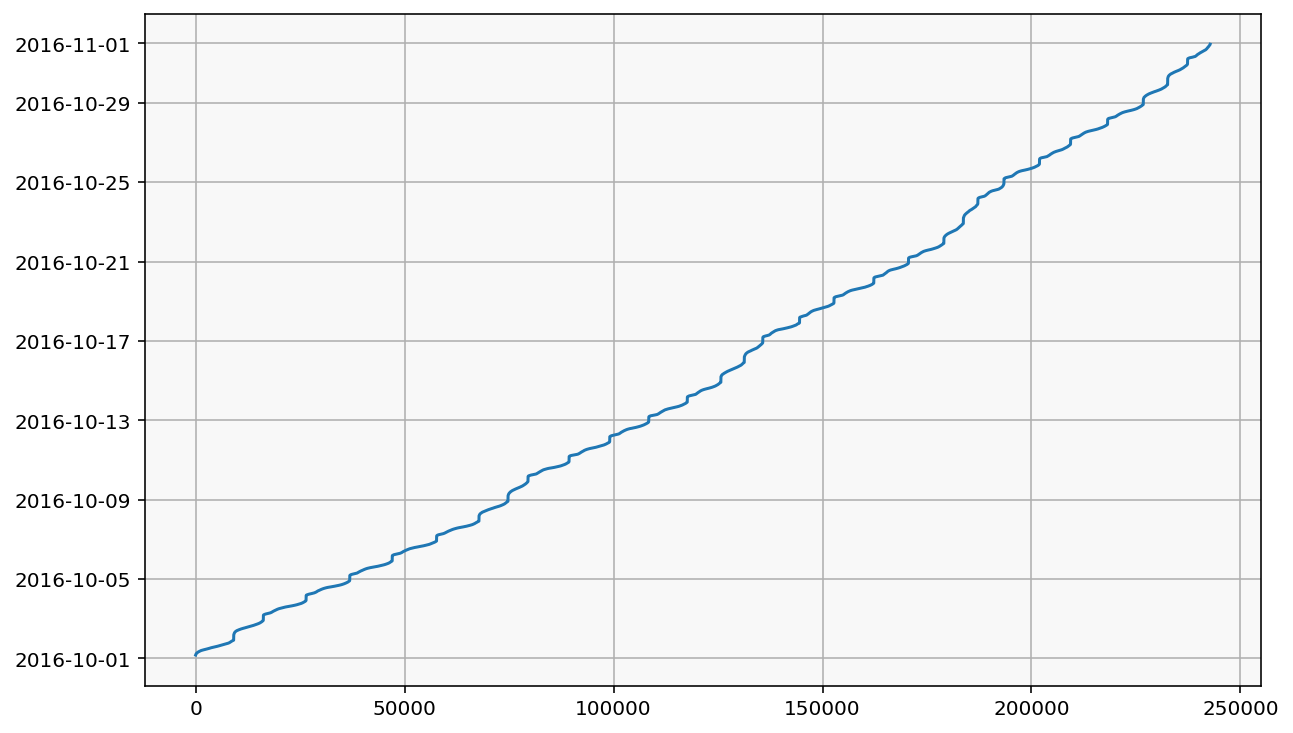

In [199]:
trips['Start time'].plot();


By default, the DataFrame index is used to label the x-axis.

## Plotting multiple columns 

Passing multiple columns results in multiple plot lines

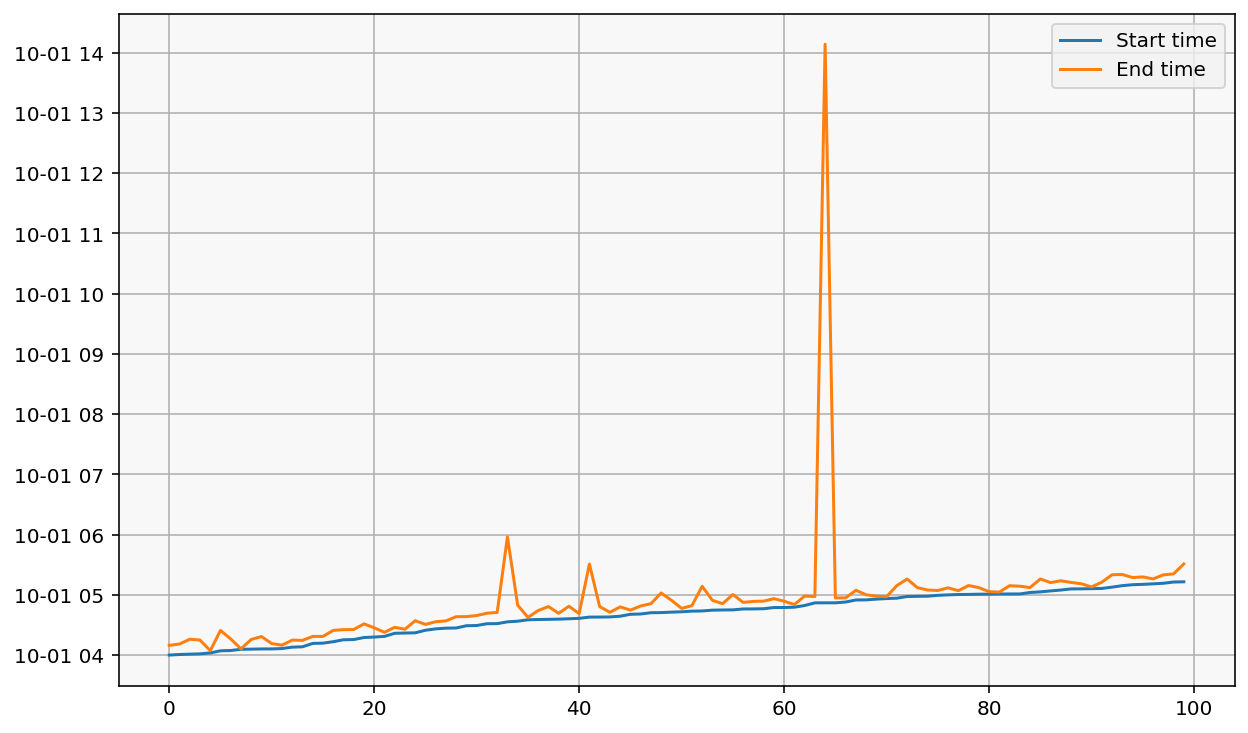

In [200]:
trips[['Start time', 'End time']].head(100).plot();

In order to get a more meaningful x-axis, we can select a column to be used as the x-axis:

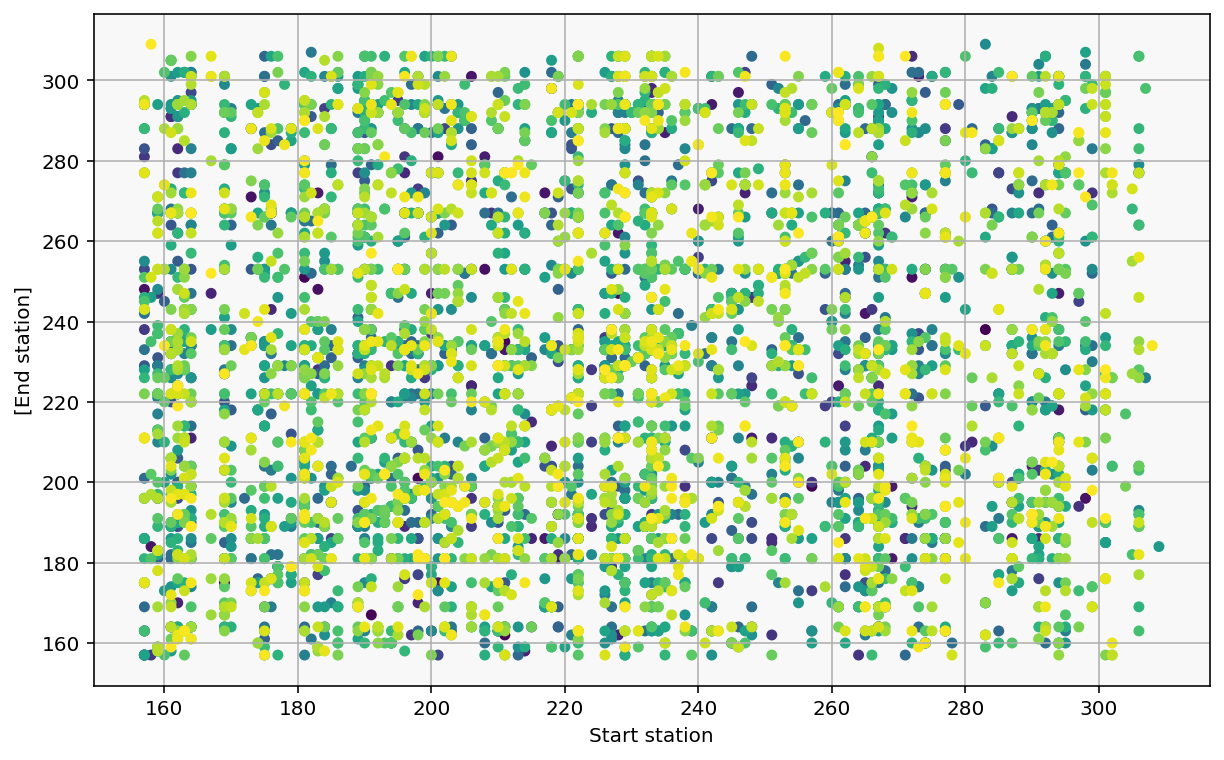

In [201]:
trips.head(5000).plot.scatter(
    x="Start station", y=["End station"], c="Start time", cmap="viridis"
);

## Bar plots

The documentation of plot reveils many more plotting options:

In [202]:
trips.plot?

Signature:      trips.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x7fbc12054af0>
File:           ~/conda/lib/python3.8/site-packages/pandas/plotting/_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'p

For example, let's create a bar plot:

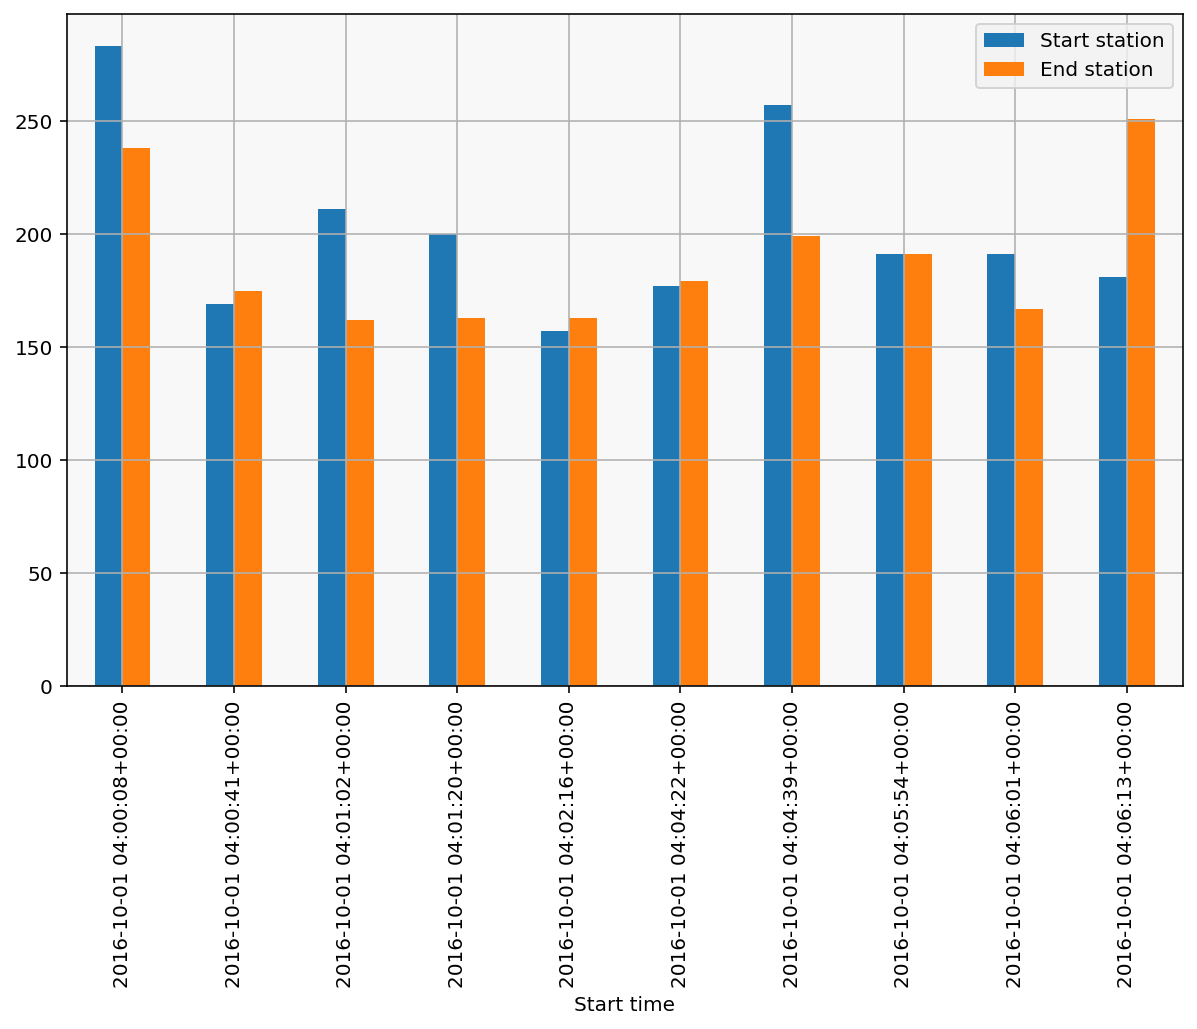

In [203]:
trips.head(10).plot(x='Start time', y=['Start station', 'End station'], kind='bar');

## Histograms

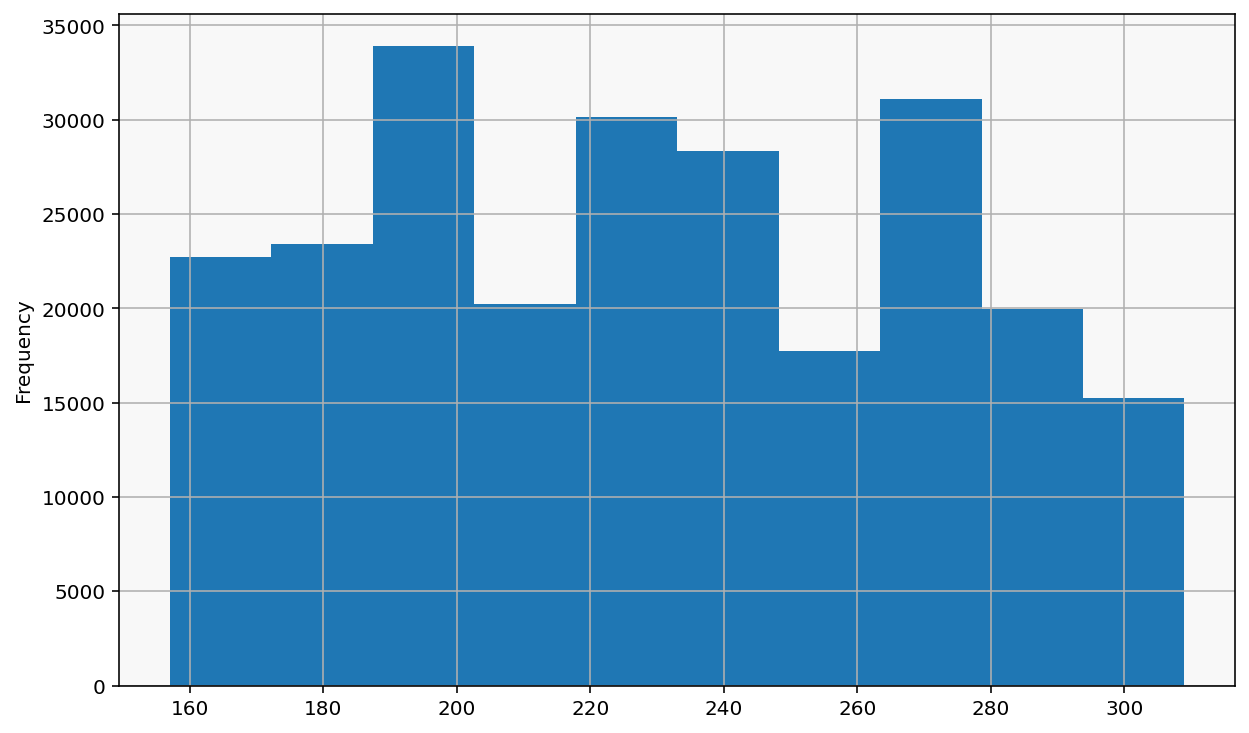

In [204]:
trips['Start station'].plot(kind='hist');

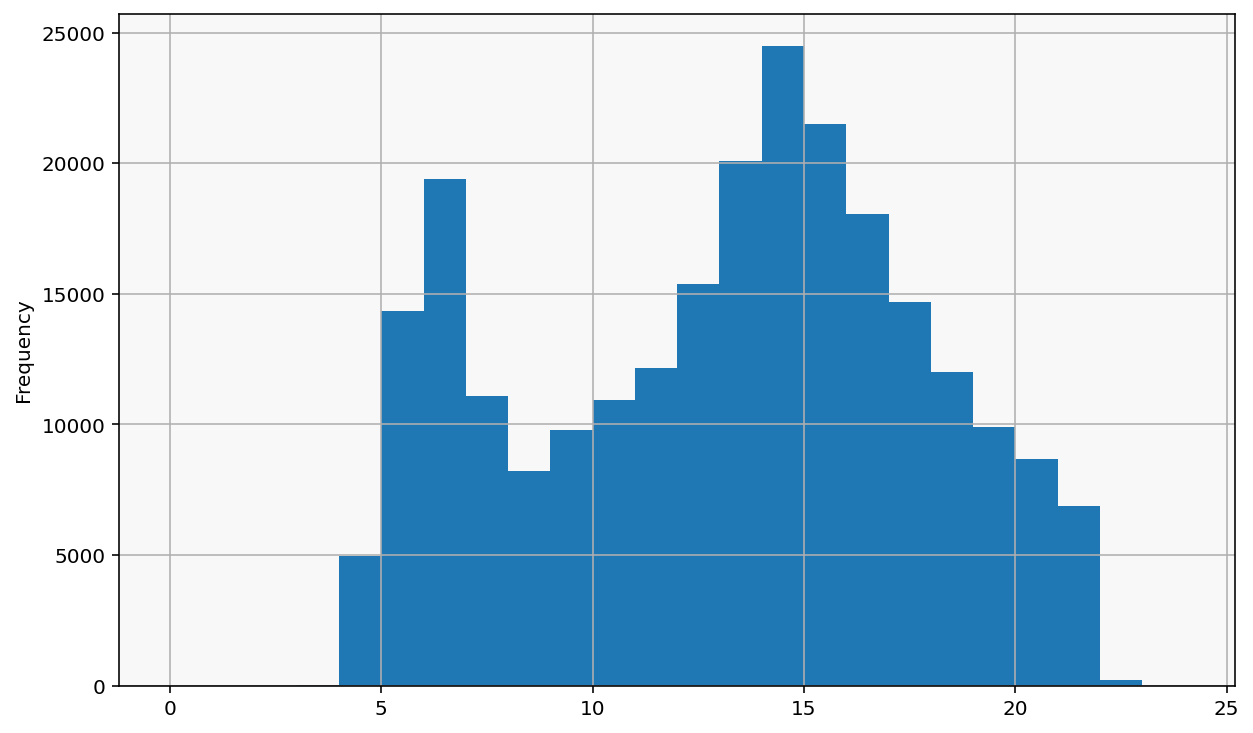

In [205]:
trips['Start time'].dt.hour.plot(kind='hist', bins=range(25));

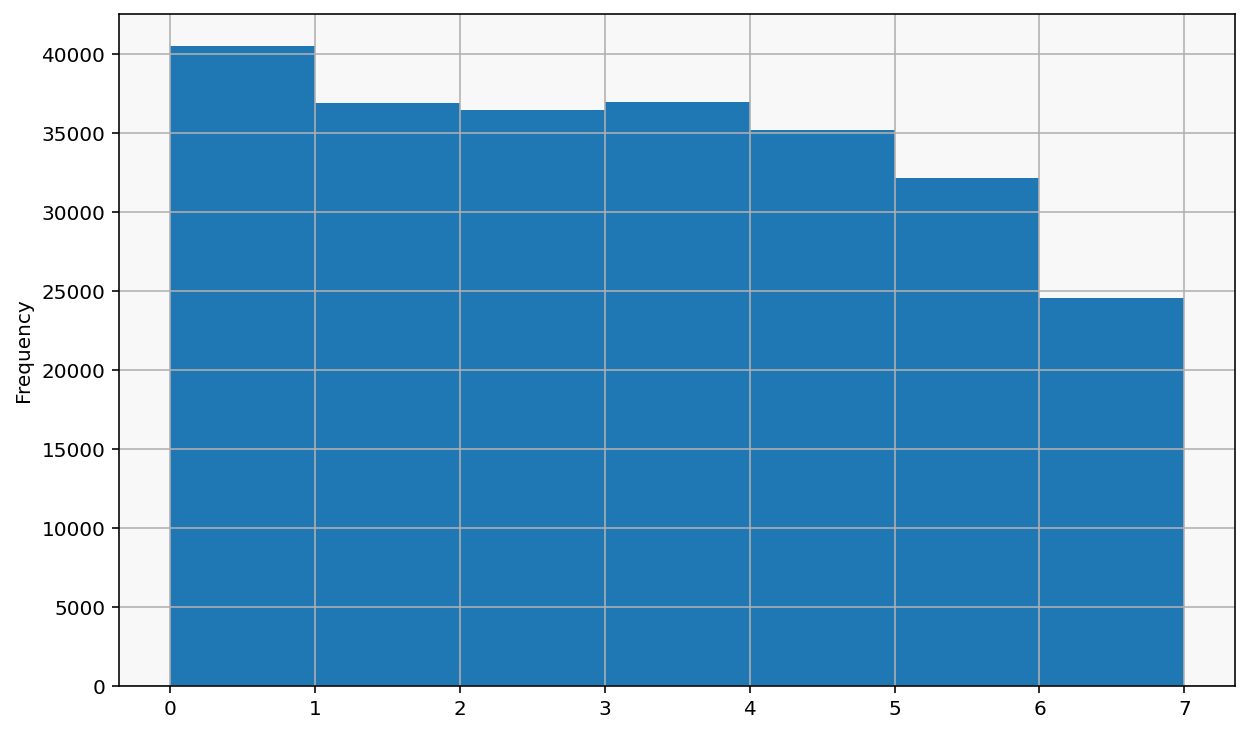

In [206]:
trips['Start time'].dt.weekday.plot.hist(bins=range(8));

In [207]:
import matplotlib.pyplot as plt

In [208]:
import calendar

In [209]:
grouped.count()["Start station"].unstack(1)

,False,True
Start time,,
0,129,40397
1,126,36781
2,106,36362
3,125,36865
4,111,35088
5,154,31971
6,132,24411


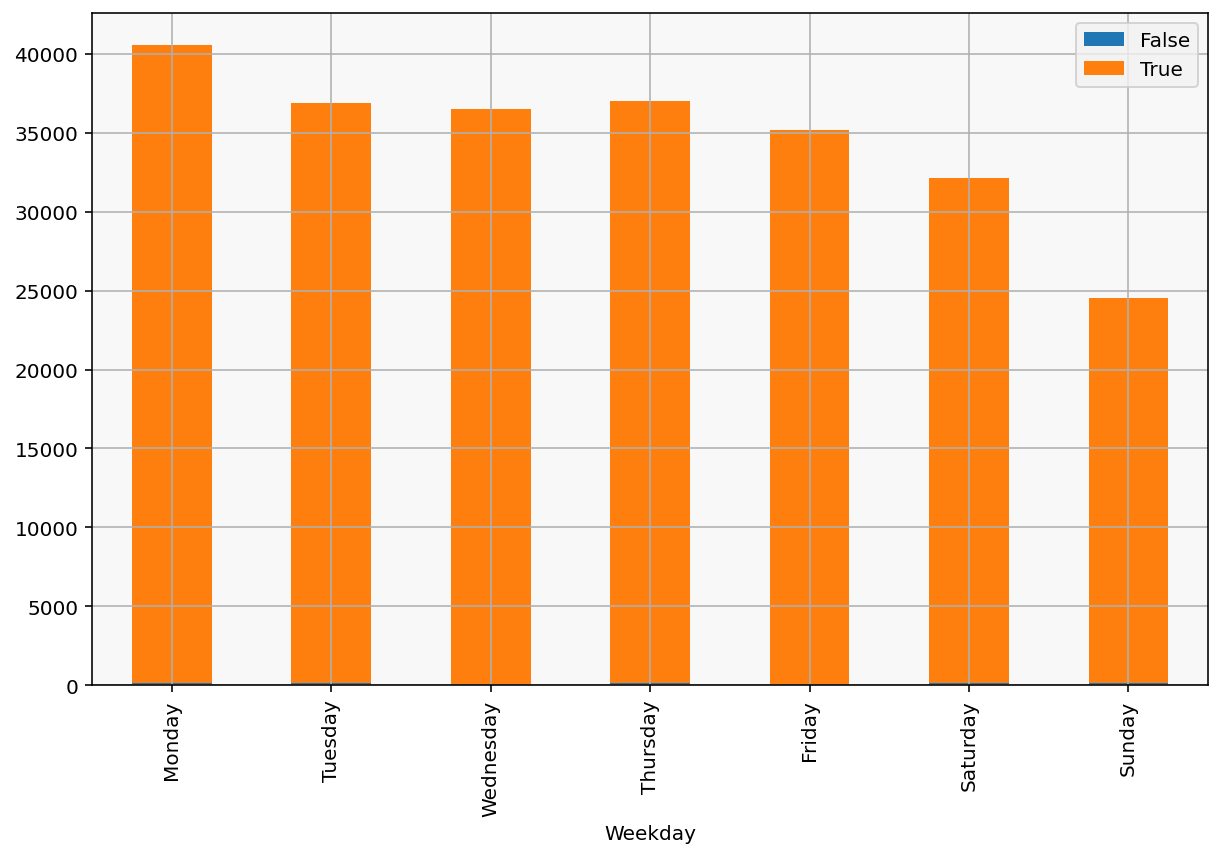

In [210]:
grouped.count()["Start station"].unstack(1).plot(kind="bar", stacked=True)
plt.xlabel("Weekday");
plt.xticks(range(7), calendar.day_name);

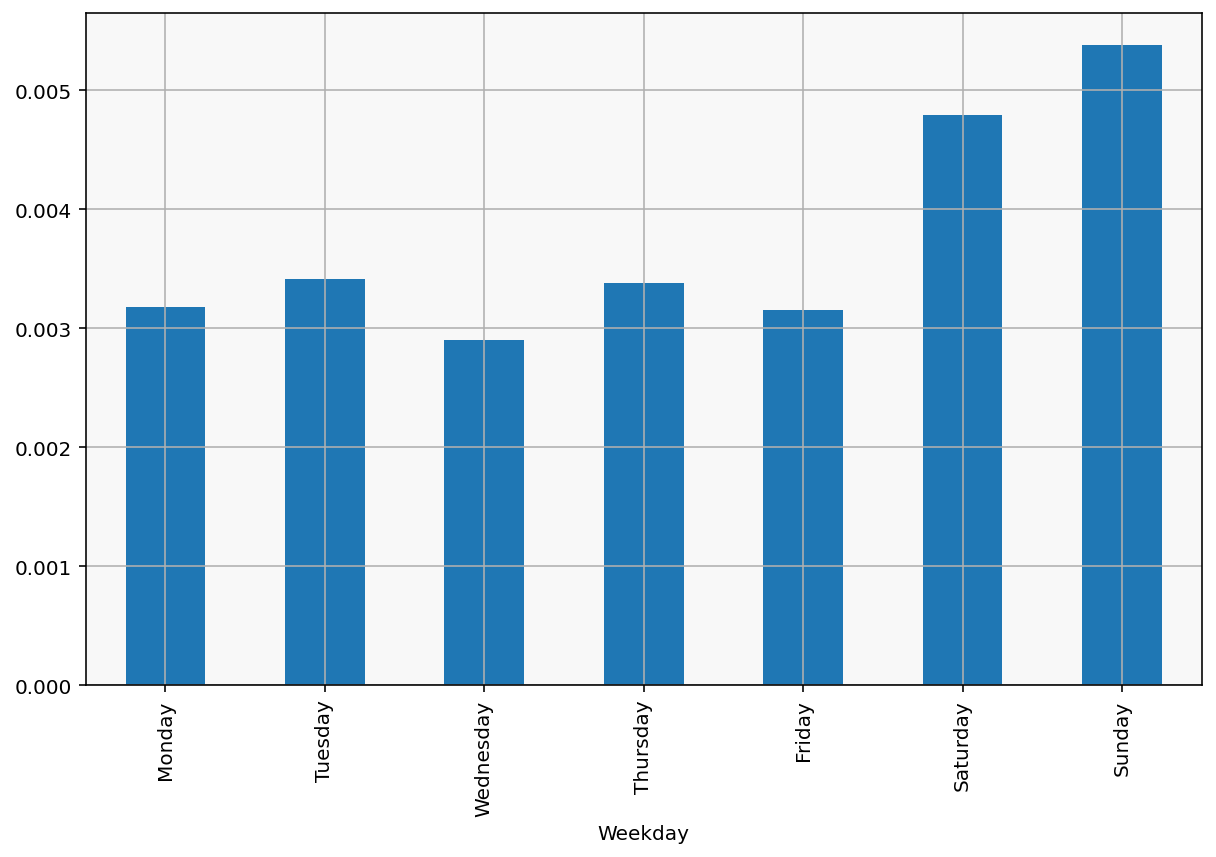

In [211]:
(grouped.count() / by_day.count())["Start station"].unstack(1)[False].plot.bar()
plt.xlabel("Weekday");
plt.xticks(range(7), calendar.day_name);

## Saving data 

DataFrames can be saved to various formats. 

For exporting to a spreadsheet compatible format (e.g. Excel), you can export as CSV file: 

In [ ]:
data = trips[['Start station', 'End station']].head(10)

with open("start_stop_stations.csv", "w") as file:
    csv =  data.to_csv()
    print(csv)
    file.write(csv)

## Usefull trick for your bachelor/master thesis

**Goal**: If you do data analyis as part of your research, it is usefull to generate any figures/tables directly from your analytics scripts. 

**Solution**: Pandas can automatically generate Latex tables: 

In [ ]:
with open('table.tex', 'w') as file:
    latex = data.to_latex()
    print(latex)
    file.write(latex)


## Simple data analytics: What are the most used bike stations?

**Approach**: For each bike station usage, the station's `id` occurs in a new row in the `Start station` column. 
In order to find how often a bike station is used, we count how often the station id occurs in the `Start station` column. By sorting these counds from high to low, we get the most used bike stations. 

The function `value_counts` does exactly what we need:

In [ ]:
trips['Start station'].value_counts()[10:]   

Let's plot the result in the bar chart:

In [ ]:
trips['Start station'].value_counts()[:50].plot(kind='bar');


## Concatenating DataFrames 1/2

The data so far only contained the statistics for October 2016:

In [ ]:
trips["Start time"].min(), trips["Start time"].max()

Let us load the data for September 2016:

In [ ]:
trips_sep = pd.read_csv('data/bysykkel/trips-2016.9.1-2016.9.30.csv', 
                         sep=',', 
                         parse_dates=['Start time', 'End time'],
                         date_parser=lambda col: pd.to_datetime(col, utc=True))

## Concatenating DataFrames 2/2

To concatenate the two, we use the `concat` function:

In [ ]:
trips = pd.concat((trips_sep, trips))

**Note**: For such simple concatenation, you can altnerative use `append`:
```
trips_sep_oct = trips_sep.append(trips)
```

Let's check that we indeed have the full range:

In [ ]:
trips["Start time"].min(), trips["Start time"].max()

# Linking multiple tables

**Problem**: At the moment, the bike stations are anonymous ids. It would be usefull to have additional meta-data (location name, GPS coordinates, ...) attached. 

Luckily we have a file that contains this information:

In [ ]:
import json
with open("data/bysykkel/stations.json") as f:
    station_info = json.load(f)
station_info["stations"][:5]

## Reading the station information 1/3

The obvious thing would be to use `pd.read_json`:

In [ ]:
bike_stations = pd.read_json('data/bysykkel/stations')

Does not work because `read_json` expects the json to have a specific structure.

## Reading the station information 2/3

Instead we load the data with the `json` module:

In [ ]:
import json
with open('data/bysykkel/stations.json', 'r') as f:
    stations_json = json.load(f)
print(stations_json.keys())


We are interested in the node `stations`, so let's extract this:

In [ ]:
station_json = stations_json['stations']
print(len(station_json))
station_json[:3]

### Reading in station infromation 3/3

We can now use the `pandas.io.json_normalize` function to read in the entire dataset:

In [ ]:
stations = pd.json_normalize(station_json)
stations

## Setting the index

Before extracting data from the `DataFrame`, it is good practice to assign a column with unique values as the index of the dataframe (if possible). For the stations DataFrame, the `id` column is a natural choice:

In [ ]:
stations = stations.set_index('id')
stations

The index will be used, e.g. for row labels when plotting:

In [ ]:
stations.head(10)["number_of_locks"].plot(kind="bar");

### Removing columns from DataFrames

Some of the columns are not usefull. We can remove columns from a DataFrame with:
```python
Dataframe.drop([Column Name or list], axis=1)
```
Lets reduce our stations to the usefull columns:

In [ ]:
stations = stations.drop(["bounds", "subtitle"], axis=1)   # axis=0 drops rows
stations.head()

**Alternative**: Use `.loc` to select a subset of a DataFrame
```python
DataFrame.loc[startrow:endrow,startcolumn:endcolumn]
```

## Adding computed columns

Sometimes it is usefull to add a new column based on calculations. 

**Syntax**:
```python
Dataframe.apply(function, axis=1)  # Results in a Series
``` 

**Example**: Add a column with the distance from the station to Oslo center. 

First we compute a Series with the distance values:

In [ ]:
from math import cos, asin, sqrt, pi

def distance_to_oslo_center(row):
    """ Computes the distance of a lat/lon"""
    
    lat1 = row["center.latitude"]
    lon1 = row["center.longitude"]
    
    lat2 = 59.9127  # Oslo center latitude
    lon2 = 10.7461  # Oslo center longitude
    
    p = pi/180 
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    return 12742 * asin(sqrt(a)) #2*R*asin...

distance = stations.apply(distance_to_oslo_center, axis=1)
distance 

Then we add that serie to the DataFrame:

In [ ]:
stations["distance_to_oslo_center"] = distance
stations

### Min, max mean of Series data:

We can use mathematical functions such as `min`, `max` or `mean` to get statistical information about a column:

Minimum number of locks:

In [ ]:
stations["number_of_locks"].min()

Maximum number of locks:

In [ ]:
stations["number_of_locks"].max()

Average number of locks:

In [ ]:
stations["number_of_locks"].mean()

## Plotting maps

It would be nice to plot the stations on a map.

NameError: name 'stations' is not defined

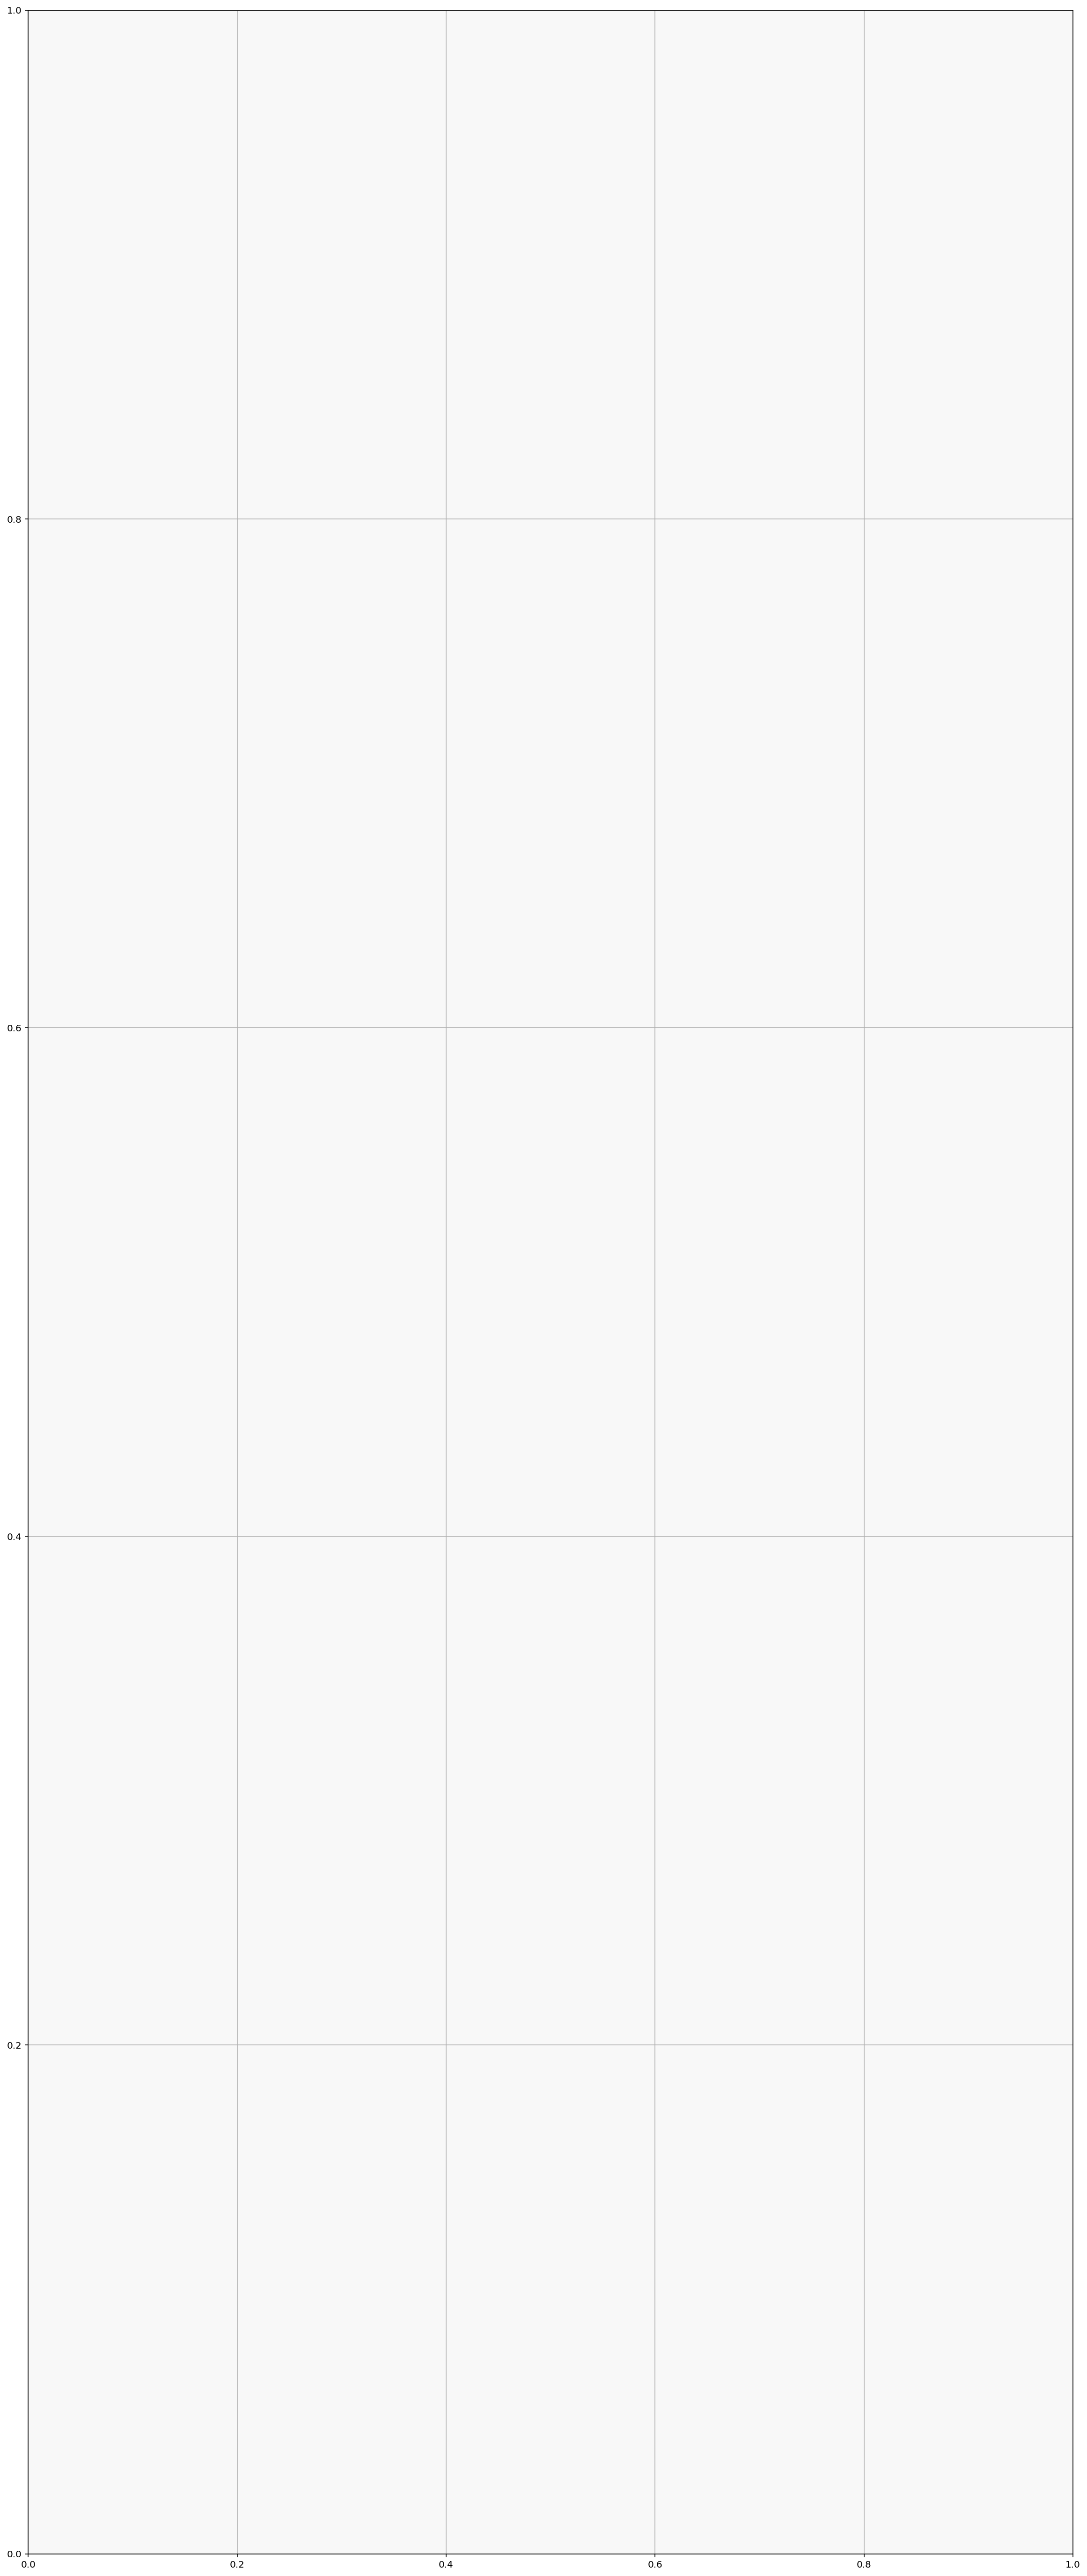

In [171]:
import matplotlib.pyplot as plt

# Read the map image from OpenStreetmap
ruh_m = plt.imread('oslo.png')
        
# Create a new figure 
fig, ax = plt.subplots(figsize = (20, 50))

# Add the scatter plot of all stations
ax.scatter(stations["center.longitude"], stations["center.latitude"], zorder=1, alpha=1, c='b', s=20)


# Set the title
ax.set_title('Oslo Bysykkel stations')

# Set the bounding box
BBox = ((stations["center.longitude"].min(), stations["center.longitude"].max(),      
         stations["center.latitude"].min(), stations["center.latitude"].max()))

# Add the background image with the map
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

# Merging Panda objects

So far our bike statistics stores the bike stations as abstract integers:


In [ ]:
trips_sep_oct.head()

Wouldn't it be nice to add the station information? 

We achieve this by merging the information in the `stations` DataFrame into the `trips_sep_oct` DataFrame. The syntax for merging two tables with the most important arguments is:

```python
pd.merge(left, right, how='inner', left_on=None, right_on=None)
```         
The arguments mean the following:
* `left`: A DataFrame object
* `right`: Another DataFrame object
* `left_on`: Columns from the left DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame
* `right_on`: Columns from the right DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame
* `how`: One of 'left', 'right', 'outer', 'inner'. Defaults to inner. See below for more detailed description of each method:


###  A simple demo on merging

In [ ]:
purchases = pd.DataFrame({'product': ["apples", "oranges"], 
                           'purchases': [1, 3]})
purchases

In [ ]:
prices = pd.DataFrame({'product': ["apples", "pears"],
                       'price': [5.5, 1.2]})
prices

In [ ]:
pd.merge(purchases, prices, how='right', left_on="product", right_on="product")

### Back to the Oslo Bysykkel example

Let's try it out. First, lets check the names of our columns again:

In [ ]:
print(trips_sep_oct.dtypes)

In [ ]:
print(stations.dtypes)

We want to merge in the columns `trips_sep_oct["Start station"]` with the index for `stations`. We merge call is therefore:

In [ ]:
merged_bike_stats = pd.merge(trips_sep_oct, stations, how='left', left_on="Start station", right_index=True)
merged_bike_stats

Let's check that we still have all the data rows:

In [ ]:
print(len(merged_bike_stats))
print(len(trips_sep_oct))

Wohooo!

Let us do the same for `End station`. To avoid overlapping column names, we use the `suffices`:

In [ ]:
merged_bike_stats2 = pd.merge(merged_bike_stats, stations, how='left', left_on="End station", 
                              right_index=True, suffixes=("_start", "_end"))
merged_bike_stats2

## What are the busiest stations?

Let's first find the busiest station:

In [ ]:
busy_station = merged_bike_stats2['Start station'].value_counts()[:5]
busy_station

In [ ]:
stations.loc[busy_station.index]

### What is the usage pattern of the busiest station?

Filter out all trips starting from the bussiest station

In [ ]:
ak_plass_stats = merged_bike_stats[merged_bike_stats["Start station"] == busy_station.index[0]]
ak_plass_stats.head()

Plot the results:

In [ ]:
resampled_trips = pd.DataFrame({"Counter": 1}, 
                                index=ak_plass_stats["Start time"])
resampled_trips.head()

In [ ]:
resampled_trips = resampled_trips.resample('30T').sum()   # resample every 30 minutes and sum results
resampled_trips.head()

In [ ]:
resampled_trips.loc["2016-09-01 04:00:00":"2016-09-03 04:00:00"].plot(y=['Counter'])